In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

## 第一题

In [2]:
num = 101
interval = 1 / (num - 1)
np.random.seed(100)

In [3]:
# 生成布朗过程轨道
# 默认T的区间是[0, 1]
def Brown_Process(interval, c):
    zengliang = np.random.normal(loc=0, scale=c*interval, size=int(num - 1))
    G = np.append(0, zengliang)
    # for index_t in range(zengliang.shape[0]):
    G = np.array([np.sum(G[0 : index_t+1]) for index_t in range(G.shape[0])])

    return G

用种子的随机性测试多条布朗运动的轨道

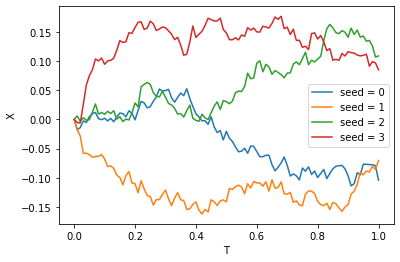

In [4]:
[num, c] = [101, 1]
for seed in range(4):
    T = np.linspace(0, 1, int(num))
    X = Brown_Process(1/(num-1), c)
    plt.plot(T, X, label='seed = '+ str(seed))
    plt.xlabel('T')
    plt.ylabel('X')
    plt.legend()
plt.savefig(r'./figs/多条布朗运动轨道.png')
plt.show()
plt.close()

对于相同的种子，测试 $c = 10$ 的布朗运动轨道

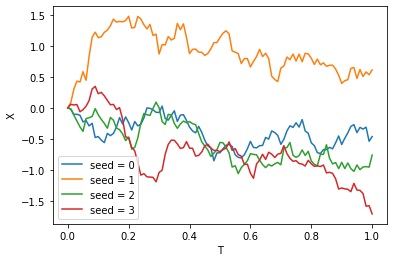

In [5]:
[num, c] = [101, 10]
for seed in range(4):
    T = np.linspace(0, 1, int(num))
    X = Brown_Process(1/(num-1), c)
    plt.plot(T, X, label='seed = '+ str(seed))
    plt.xlabel('T')
    plt.ylabel('X')
    plt.legend()
plt.savefig(r'./figs/多条布朗运动轨道c=10.png')
plt.show()
plt.close()

## 第二题

In [6]:
def SDE1(d_t=0.01):
    d_B = np.random.normal(loc=0, scale=d_t, size=100)
    R = np.zeros(d_B.shape[0]+1)
    R[0] = x_0
    for index_t in range(100):
        R[index_t+1] = R[index_t] + alpha*(v - R[index_t])*d_t + sigma*d_B[index_t]

    return R

利用不同的种子测试随机微分方程1

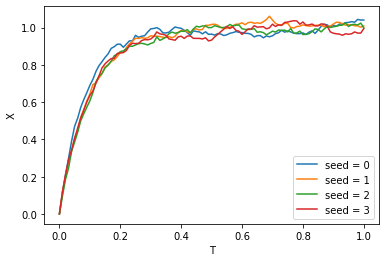

In [7]:
d_t = 0.01
[alpha, v, sigma, x_0] = [10, 1, 1, 0]
for seed in range(4):
    np.random.seed(seed)
    T = np.linspace(0, 100*d_t, 101)
    X = SDE1(d_t)
    plt.plot(T, X, label=r'seed = %s'%str(seed))
    plt.xlabel('T')
    plt.ylabel('X')
    plt.legend()
plt.savefig(r'./figs/随机微分方程1的解多条轨道.png')
plt.show()

测试 $\alpha$ 的作用

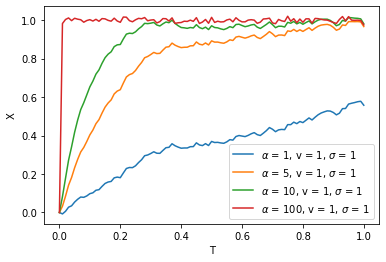

In [8]:
d_t = 0.01
for [alpha, v, sigma, x_0] in [[1, 1, 1, 0], [5, 1, 1, 0], [10, 1, 1, 0], [100, 1, 1, 0]]:
    np.random.seed(100)
    T = np.linspace(0, 100*d_t, 101)
    X = SDE1(d_t)
    plt.plot(T, X, label=r'$\alpha$ = %s, v = %s, $\sigma$ = %s'%(str(alpha), str(v), str(sigma)))
    plt.xlabel('T')
    plt.ylabel('X')
    plt.legend()
plt.savefig(r'./figs/随机微分方程解1参数alpha.png')
plt.show()

测试 $v$ 的作用

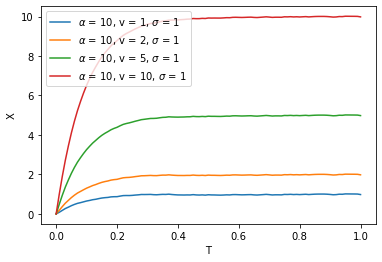

In [9]:
d_t = 0.01
for [alpha, v, sigma, x_0] in [[10, 1, 1, 0], [10, 2, 1, 0], [10, 5, 1, 0], [10, 10, 1, 0]]:
    np.random.seed(100)
    T = np.linspace(0, 100*d_t, 101)
    X = SDE1(d_t)
    plt.plot(T, X, label=r'$\alpha$ = %s, v = %s, $\sigma$ = %s'%(str(alpha), str(v), str(sigma)))
    plt.xlabel('T')
    plt.ylabel('X')
    plt.legend()
plt.savefig(r'./figs/随机微分方程解1参数v.png')
plt.show()

测试 $\sigma$ 对轨道的影响

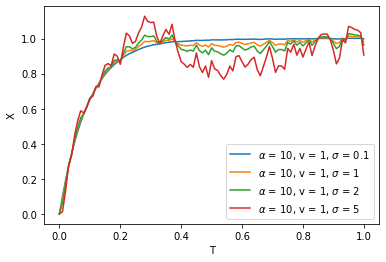

In [10]:
d_t = 0.01
for [alpha, v, sigma, x_0] in [[10, 1, 0.1, 0], [10, 1, 1, 0], [10, 1, 2, 0], [10, 1, 5, 0]]:
    np.random.seed(100)
    T = np.linspace(0, 100*d_t, 101)
    X = SDE1(d_t)
    plt.plot(T, X, label=r'$\alpha$ = %s, v = %s, $\sigma$ = %s'%(str(alpha), str(v), str(sigma)))
    plt.xlabel('T')
    plt.ylabel('X')
    plt.legend()
plt.savefig(r'./figs/随机微分方程解1参数sigma.png')
plt.show()

测试 $x_0$ 对轨道的影响

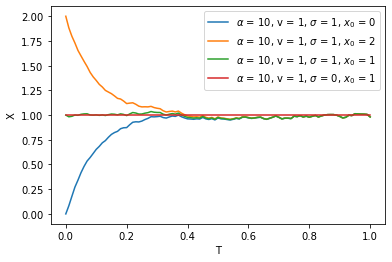

In [11]:
d_t = 0.01
for [alpha, v, sigma, x_0] in [[10, 1, 1, 0], [10, 1, 1, 2], [10, 1, 1, 1], [10, 1, 0, 1]]:
    np.random.seed(100)
    T = np.linspace(0, 100*d_t, 101)
    X = SDE1(d_t)
    plt.plot(T, X, label=r'$\alpha$ = %s, v = %s, $\sigma$ = %s, $x_0$ = %s'%(str(alpha), str(v), str(sigma), str(x_0)))
    plt.xlabel('T')
    plt.ylabel('X')
    plt.legend()
plt.savefig(r'./figs/随机微分方程解1参数x0.png')
plt.show()

计算 $E(X_1)$ 和 $D(X_1)$

In [12]:
Q = []
for [alpha, v, sigma, x_0] in [[1, 1, 1, 0], [5, 1, 1, 0], [10, 1, 1, 0], [100, 1, 1, 0]]:
    MC_SDE1 = np.zeros(1000)
    for seed in range(1000):
        np.random.seed(seed)
        MC_SDE1[seed] = SDE1(d_t)[-1]
    Expection = np.mean(MC_SDE1)
    # print('Expectation E(X_1) = %s'%str(Expection))
    Variance = np.var(MC_SDE1)
    # print('Variance D(X_1) = %s'%str(Expection))
    Q.append([alpha, Expection, Variance])
df1 = pd.DataFrame(Q, columns=['alpha', 'E(X_1)', 'D(X_1)'])

Q = []
for [alpha, v, sigma, x_0] in [[10, 1, 1, 0], [10, 2, 1, 0], [10, 5, 1, 0], [10, 10, 1, 0]]:
    MC_SDE1 = np.zeros(1000)
    for seed in range(1000):
        np.random.seed(seed)
        MC_SDE1[seed] = SDE1(d_t)[-1]
    Expection = np.mean(MC_SDE1)
    # print('Expectation E(X_1) = %s'%str(Expection))
    Variance = np.var(MC_SDE1)
    # print('Variance D(X_1) = %s'%str(Expection))
    Q.append([v, Expection, Variance])
df2 = pd.DataFrame(Q, columns=['v', 'E(X_1)', 'D(X_1)'])

Q = []
for [alpha, v, sigma, x_0] in [[10, 1, 0.1, 0], [10, 1, 1, 0], [10, 1, 2, 0], [10, 1, 5, 0]]:
    MC_SDE1 = np.zeros(1000)
    for seed in range(1000):
        np.random.seed(seed)
        MC_SDE1[seed] = SDE1(d_t)[-1]
    Expection = np.mean(MC_SDE1)
    # print('Expectation E(X_1) = %s'%str(Expection))
    Variance = np.var(MC_SDE1)
    # print('Variance D(X_1) = %s'%str(Expection))
    Q.append([sigma, Expection, Variance])
df3 = pd.DataFrame(Q, columns=['sigma', 'E(X_1)', 'D(X_1)'])

Q = []
for [alpha, v, sigma, x_0] in [[10, 1, 1, 0], [10, 1, 1, 2], [10, 1, 1, 5], [10, 1, 1, 10]]:
    MC_SDE1 = np.zeros(1000)
    for seed in range(1000):
        np.random.seed(seed)
        MC_SDE1[seed] = SDE1(d_t)[-1]
    Expection = np.mean(MC_SDE1)
    # print('Expectation E(X_1) = %s'%str(Expection))
    Variance = np.var(MC_SDE1)
    # print('Variance D(X_1) = %s'%str(Expection))
    Q.append([x_0, Expection, Variance])
df4 = pd.DataFrame(Q, columns=['x_0', 'E(X_1)', 'D(X_1)'])

In [13]:
df5 = pd.concat([df1, df2], axis=1).round(6)
df6 = pd.concat([df3, df4], axis=1).round(6)
df5.to_csv('./Tex/df_tem1.csv',mode='a', index=False, header=True)
df6.to_csv('./Tex/df_tem1.csv',mode='a', index=False, header=True)

In [14]:
df = pd.read_csv('./Tex/df_tem1.csv')
df

,alpha,E(X_1),D(X_1),v,E(X_1).1,D(X_1).1
0,1,0.636873,0.004301,1,1.000939,0.000513
1,5,0.99551,0.000966,2,2.000912,0.000513
2,10,1.000939,0.000513,5,5.000832,0.000513
3,100,0.999987,0.000101,10,10.000699,0.000513
4,sigma,E(X_1),D(X_1),x_0,E(X_1),D(X_1)
5,0.1,1.00007,5e-06,0,1.000939,0.000513
6,1.0,1.000939,0.000513,2,1.000992,0.000513
7,2.0,1.001904,0.00205,5,1.001071,0.000513
8,5.0,1.004799,0.012815,10,1.001204,0.000513


## 第三题

In [15]:
def SDE2(d_t=0.01):
    d_B = np.random.normal(loc=0, scale=d_t, size=100)
    d_W = np.random.normal(loc=0, scale=d_t, size=100)
    X = np.zeros(d_B.shape[0]+1)
    S = np.zeros(d_B.shape[0]+1)
    X[0] = x_0
    S[0] = s_0
    for index_t in range(100):
        X[index_t+1] = X[index_t] + alpha*(v - X[index_t])*d_t + sigma*d_B[index_t]
        S[index_t+1] = S[index_t] + theta*(X[index_t] - S[index_t])*d_t + sigma_1*d_B[index_t] + sigma_2*d_W[index_t]


    return X, S

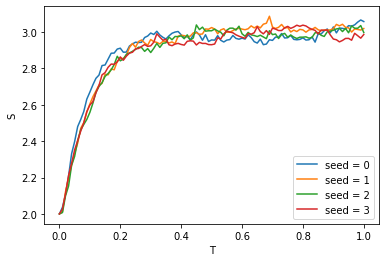

In [16]:
d_t = 0.01
[alpha, v, sigma, theta, sigma_1, sigma_2, x_0, s_0] = [10, 3, 1, 100, 1, 1, 2, 2]
for seed in range(4):
    np.random.seed(seed)
    T = np.linspace(0, 100*d_t, 101)
    X, S = SDE2(d_t)
    plt.plot(T, S, label=r'seed = %s'%str(seed))
    plt.xlabel('T')
    plt.ylabel('S')
    plt.legend()
plt.savefig(r'./figs/随机微分方程解2的多条轨道S-T.png')
plt.show()
plt.close()


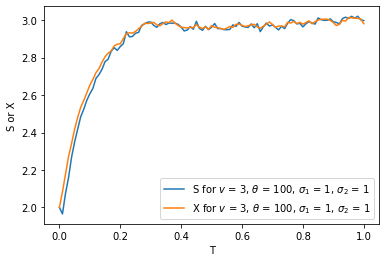

In [17]:
d_t = 0.01
[alpha, v, sigma, theta, sigma_1, sigma_2, x_0, s_0] = [10, 3, 1, 100, 1, 1, 2, 2]
np.random.seed(100)
T = np.linspace(0, 100*d_t, 101)
X, S = SDE2(d_t)
plt.plot(T, S, label=r'S for $v$ = %s, $\theta$ = %s, $\sigma_1$ = %s, $\sigma_2$ = %s'%(str(v), str(theta), str(sigma_1), str(sigma_2)))
plt.plot(T, X, label=r'X for $v$ = %s, $\theta$ = %s, $\sigma_1$ = %s, $\sigma_2$ = %s'%(str(v), str(theta), str(sigma_1), str(sigma_2)))
plt.xlabel('T')
plt.ylabel('S or X')
plt.legend()
plt.savefig(r'./figs/随机微分方程解2的多条轨道SX-T.png')
plt.show()
plt.close()

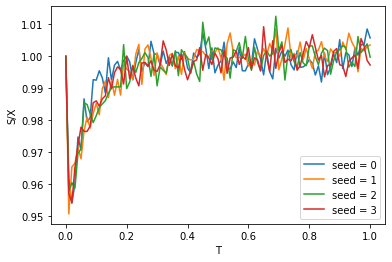

In [18]:
d_t = 0.01
[alpha, v, sigma, theta, sigma_1, sigma_2, x_0, s_0] = [10, 3, 1, 100, 1, 1, 2, 2]
for seed in range(4):
    np.random.seed(seed)
    T = np.linspace(0, 100*d_t, 101)
    X, S = SDE2(d_t)
    ratio = [S[index_t]/X[index_t] for index_t in range(X.shape[0])]
    plt.plot(T, ratio, label=r'seed = %s'%str(seed))
    plt.xlabel('T')
    plt.ylabel('S/X')
    plt.legend()
plt.savefig(r'./figs/随机微分方程解2的多条轨道Ratio-T.png')
plt.show()
plt.close()

测试 $\alpha$ 的作用

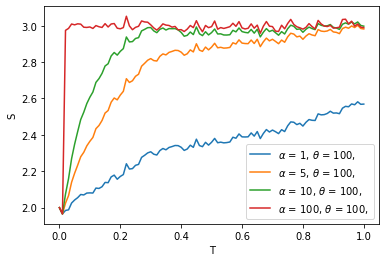

In [19]:
d_t = 0.01
for [alpha, v, sigma, theta, sigma_1, sigma_2, x_0, s_0] in [[1, 3, 1, 100, 1, 1, 2, 2], 
                                                            [5, 3, 1, 100, 1, 1, 2, 2], 
                                                            [10, 3, 1, 100, 1, 1, 2, 2],
                                                            [100, 3, 1, 100, 1, 1, 2, 2]]:
    np.random.seed(100)
    T = np.linspace(0, 100*d_t, 101)
    X, S = SDE2(d_t)
    plt.plot(T, S, label=r'$\alpha$ = %s, $\theta$ = %s, '%(str(alpha), str(theta)))
    plt.xlabel('T')
    plt.ylabel('S')
    plt.legend()
plt.savefig(r'./figs/随机微分方程解2参数alpha.png')
plt.show()
plt.close()

测试 $\theta$ 的作用

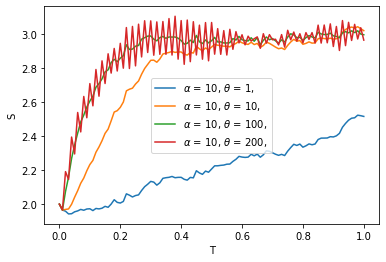

In [20]:
d_t = 0.01
for [alpha, v, sigma, theta, sigma_1, sigma_2, x_0, s_0] in [[10, 3, 1, 1, 1, 1, 2, 2], 
                                                            [10, 3, 1, 10, 1, 1, 2, 2], 
                                                            [10, 3, 1, 100, 1, 1, 2, 2],
                                                            [10, 3, 1, 200, 1, 1, 2, 2]]:
    np.random.seed(100)
    T = np.linspace(0, 100*d_t, 101)
    X, S = SDE2(d_t)
    plt.plot(T, S, label=r'$\alpha$ = %s, $\theta$ = %s, '%(str(alpha), str(theta)))
    plt.xlabel('T')
    plt.ylabel('S')
    plt.legend()
plt.savefig(r'./figs/随机微分方程解2参数theta.png')
plt.show()
plt.close()

测试 $\sigma_1$ 和 $\sigma_2$ 的作用

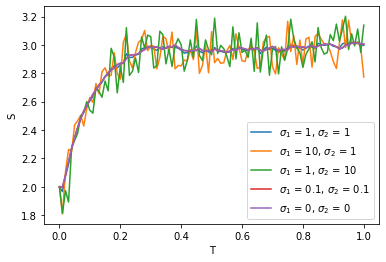

In [21]:
d_t = 0.01
for [alpha, v, sigma, theta, sigma_1, sigma_2, x_0, s_0] in [[10, 3, 1, 100, 1, 1, 2, 2], 
                                                            [10, 3, 1, 100, 10, 1, 2, 2], 
                                                            [10, 3, 1, 100, 1, 10, 2, 2],
                                                            [10, 3, 1, 100, 0.1, 0.1, 2, 2], 
                                                            [10, 3, 1, 100, 0, 0, 2, 2]]:
    np.random.seed(100)
    T = np.linspace(0, 100*d_t, 101)
    X, S = SDE2(d_t)
    plt.plot(T, S, label=r'$\sigma_1$ = %s, $\sigma_2$ = %s'%(str(sigma_1), str(sigma_2)))
    plt.xlabel('T')
    plt.ylabel('S')
    plt.legend()
plt.savefig(r'./figs/随机微分方程解2参数sigma.png')
plt.show()
plt.close()

测试 $v$ 和初值的作用

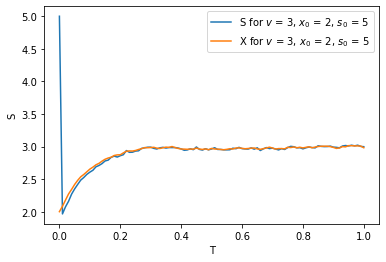

In [22]:
d_t = 0.01
[alpha, v, sigma, theta, sigma_1, sigma_2, x_0, s_0] = [10, 3, 1, 100, 1, 1, 2, 5]
np.random.seed(100)
T = np.linspace(0, 100*d_t, 101)
X, S = SDE2(d_t)
plt.plot(T, S, label=r'S for $v$ = %s, $x_0$ = %s, $s_0$ = %s'%(str(v), str(x_0), str(s_0)))
plt.plot(T, X, label=r'X for $v$ = %s, $x_0$ = %s, $s_0$ = %s'%(str(v), str(x_0), str(s_0)))
plt.xlabel('T')
plt.ylabel('S')
plt.legend()
plt.savefig(r'./figs/随机微分方程解2参数初值.png')
plt.show()
plt.close()

测试$E(S_1)$和$D(S_1)$

In [23]:
Q = []
for [alpha, v, sigma, theta, sigma_1, sigma_2, x_0, s_0] in [[1, 3, 1, 100, 1, 1, 2, 2], 
                                                            [5, 3, 1, 100, 1, 1, 2, 2], 
                                                            [10, 3, 1, 100, 1, 1, 2, 2],
                                                            [100, 3, 1, 100, 1, 1, 2, 2]]:
    MC_SDE1 = np.zeros(1000)
    for seed in range(1000):
        np.random.seed(seed)
        MC_SDE1[seed] = SDE1(d_t)[-1]
    Expection = np.mean(MC_SDE1)
    # print('Expectation E(S_1) = %s'%str(Expection))
    Variance = np.var(MC_SDE1)
    # print('Variance D(S_1) = %s'%str(Expection))
    Q.append([alpha, Expection, Variance])
df21 = pd.DataFrame(Q, columns=['alpha', 'E(S_1)', 'D(S_1)'])

Q = []
for [alpha, v, sigma, theta, sigma_1, sigma_2, x_0, s_0] in [[10, 3, 1, 1, 1, 1, 2, 2], 
                                                            [10, 3, 1, 10, 1, 1, 2, 2], 
                                                            [10, 3, 1, 100, 1, 1, 2, 2],
                                                            [10, 3, 1, 1000000, 1, 1, 2, 2]]:
    MC_SDE1 = np.zeros(1000)
    for seed in range(1000):
        np.random.seed(seed)
        MC_SDE1[seed] = SDE1(d_t)[-1]
    Expection = np.mean(MC_SDE1)
    # print('Expectation E(S_1) = %s'%str(Expection))
    Variance = np.var(MC_SDE1)
    # print('Variance D(S_1) = %s'%str(Expection))
    Q.append([theta, Expection, Variance])
df22 = pd.DataFrame(Q, columns=['theta', 'E(S_1)', 'D(S_1)'])

Q = []
for [alpha, v, sigma, theta, sigma_1, sigma_2, x_0, s_0] in [[10, 3, 1, 100, 1, 1, 2, 2], 
                                                            [10, 3, 1, 100, 1000, 1, 2, 2], 
                                                            [10, 3, 1, 100, 1, 1000, 2, 2], 
                                                            [10, 3, 10, 100, 1, 1, 2, 2]]:
    MC_SDE1 = np.zeros(1000)
    for seed in range(1000):
        np.random.seed(seed)
        MC_SDE1[seed] = SDE1(d_t)[-1]
    Expection = np.mean(MC_SDE1)
    # print('Expectation E(S_1) = %s'%str(Expection))
    Variance = np.var(MC_SDE1)
    # print('Variance D(S_1) = %s'%str(Expection))
    Q.append([[sigma, sigma_1, sigma_2], Expection, Variance])
df23 = pd.DataFrame(Q, columns=['[sigma, sigma_1, sigma_2]', 'E(S_1)', 'D(S_1)'])

Q = []
for [alpha, v, sigma, theta, sigma_1, sigma_2, x_0, s_0] in [[10, 3, 1, 100, 1, 1, 2, 2], 
                                                            [10, 5, 1, 100, 1, 1, 2, 2], 
                                                            [10, 3, 1, 100, 1, 1, 7, 2],
                                                            [10, 3, 1, 100, 1, 1, 2, 7]]:
    MC_SDE1 = np.zeros(1000)
    for seed in range(1000):
        np.random.seed(seed)
        MC_SDE1[seed] = SDE1(d_t)[-1]
    Expection = np.mean(MC_SDE1)
    # print('Expectation E(S_1) = %s'%str(Expection))
    Variance = np.var(MC_SDE1)
    # print('Variance D(S_1) = %s'%str(Expection))
    Q.append([[v, x_0, s_0], Expection, Variance])
df24 = pd.DataFrame(Q, columns=['[v, x_0, s_0]', 'E(S_1)', 'D(S_1)'])
df23

,"[sigma, sigma_1, sigma_2]",E(S_1),D(S_1)
0,"[1, 1, 1]",3.000939,0.000513
1,"[1, 1000, 1]",3.000939,0.000513
2,"[1, 1, 1000]",3.000939,0.000513
3,"[10, 1, 1]",3.009625,0.051260


In [24]:
df25 = pd.concat([df21, df22], axis=1).round(6)
df26 = pd.concat([df23, df24], axis=1).round(6)
df25.to_csv('./Tex/df_tem2.csv',mode='a', index=False, header=True)
df26.to_csv('./Tex/df_tem2.csv',mode='a', index=False, header=True)

In [25]:
df20 = pd.read_csv('./Tex/df_tem2.csv')
df20

,alpha,E(S_1),D(S_1),theta,E(S_1).1,D(S_1).1
0,1,2.636873,0.004301,1,3.000939,0.000513
1,5,2.99551,0.000966,10,3.000939,0.000513
2,10,3.000939,0.000513,100,3.000939,0.000513
3,100,2.999987,0.000101,1000000,3.000939,0.000513
4,"[sigma, sigma_1, sigma_2]",E(S_1),D(S_1),"[v, x_0, s_0]",E(S_1),D(S_1)
5,"[1, 1, 1]",3.000939,0.000513,"[3, 2, 2]",3.000939,0.000513
6,"[1, 1000, 1]",3.000939,0.000513,"[5, 2, 2]",5.000885,0.000513
7,"[1, 1, 1000]",3.000939,0.000513,"[3, 7, 2]",3.001071,0.000513
8,"[10, 1, 1]",3.009625,0.05126,"[3, 2, 7]",3.000939,0.000513
